## Task 1: Exploratory Data Analytics
### Data Collection

In [164]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt    #For plotting.


train_df = pd.read_csv("train.csv")            #Can include stop words here

def extract_features(fitting_var):
    cv_all_articles = CountVectorizer(min_df=0.20)
    cv_all_articles.fit(fitting_var)
    vec = cv_all_articles.transform(fitting_var)
    matrix = vec.toarray()              #Each row an article, each column a word.
    word_bank = cv_all_articles.get_feature_names_out()
    frequencies = matrix.sum(axis=0)    #Each column represents the frequency of a word in our articles
    return matrix, word_bank, frequencies, cv_all_articles


y = train_df["Category"].to_numpy()
unique_classes = np.unique(y)
print("Unique classes:", unique_classes)

# print(matrix)
# print(word_bank)
# print(frequencies)



Unique classes: ['entertainment' 'tech']


### Task 1 A
#### Report number of articles, number of extracted features and 5 example articles

In [165]:
# Now get five example articles (Q1 a))

X, whole_word_bank, whole_frequencies, cv = extract_features(train_df['Text'])

print("Number of articles: ", X.shape[0])
print("Number of features: ", X.shape[1])

for i in range(5):
    matrix, word_bank, frequencies, vectoriser = extract_features([train_df['Text'][i]])
    print(f"Article: {i+1} has features \n{word_bank}")
    print(f"{word_bank.size}\n\n")
    
    





Number of articles:  428
Number of features:  60
Article: 1 has features 
['000' '14' '2003' '25' '29' '45' 'able' 'across' 'activity' 'advisor'
 'ageing' 'ago' 'almost' 'alone' 'also' 'although' 'always' 'among'
 'analogue' 'another' 'bbc' 'behind' 'better' 'birthdays' 'bjorn' 'bought'
 'camera' 'cameras' 'capture' 'change' 'changed' 'chat' 'children' 'chip'
 'choice' 'consumer' 'consumers' 'contact' 'contrast' 'convenient' 'could'
 'customers' 'depth' 'desire' 'devices' 'diaries' 'diary' 'different'
 'digital' 'divide' 'dr' 'drive' 'dubbed' 'early' 'encouraged' 'end'
 'enterprise' 'equipped' 'ericsson' 'especially' 'europe' 'european'
 'even' 'events' 'everyday' 'exactly' 'example' 'factor' 'far' 'faster'
 'figure' 'film' 'firms' 'fit' 'fits' 'five' 'flop' 'focus' 'form'
 'friends' 'funkier' 'get' 'going' 'good' 'governing' 'governs'
 'gradually' 'groups' 'habits' 'handset' 'handsets' 'hardware' 'help'
 'helps' 'historically' 'holidays' 'however' 'imply' 'industry'
 'innovation' 'inn

### Task 1 B
#### i) Top 50 Frequency plot

[36 35 30 33  5 14 58 29 49 27 57  8  9 15 48 43 39 25 32 24 41 46 50 22
 26 56 10 21 47 52 59 17 45  7 51  0 53 42 54 23  2 11 18 31 55 38 40  3
 28  4]
Rank. word: frequency
1. said: 1357
2. people: 612
3. new: 500
4. one: 479
5. also: 479
6. film: 462
7. year: 442
8. music: 413
9. us: 411
10. mr: 408
11. would: 374
12. best: 361
13. could: 322
14. first: 306
15. uk: 297
16. time: 271
17. show: 271
18. many: 259
19. number: 257
20. make: 253
21. technology: 250
22. tv: 246
23. use: 241
24. like: 239
25. million: 229
26. world: 222
27. digital: 221
28. last: 220
29. two: 217
30. users: 214
31. years: 212
32. get: 198
33. top: 195
34. bbc: 189
35. used: 183
36. 000: 179
37. way: 178
38. three: 173
39. well: 172
40. made: 169
41. 2004: 161
42. director: 155
43. go: 152
44. next: 141
45. work: 141
46. set: 140
47. take: 138
48. according: 138
49. much: 135
50. already: 133


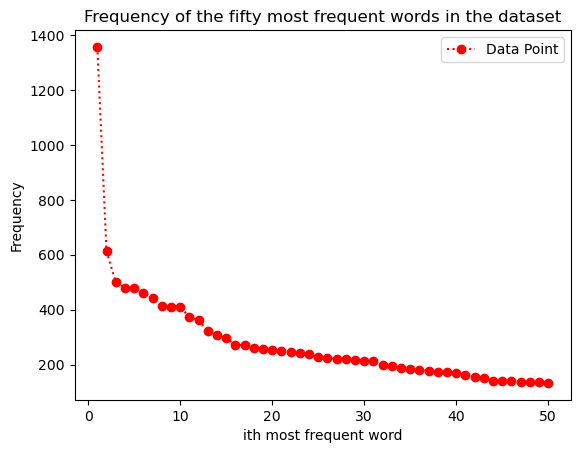

In [166]:
#Get the top 50 terms in the entire dataset
indices_50 = whole_frequencies.argsort()[-50:][::-1] #Get the indices of the top 50 terms
print(indices_50)

top_50_features = whole_word_bank[indices_50] #Get the top 50 features
top_50_feature_frequencies = whole_frequencies[indices_50] #Get the frequencies of the top 50 features

print("Rank. word: frequency")
for i in range(top_50_features.size):
    print(f"{i+1}. {top_50_features[i]}: {top_50_feature_frequencies[i]}") #Print the top 50 features and their frequencies

#Now we can plot the top 50 features with their frequencies
plt.plot()

plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", label="Data Point")
plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset")
plt.show()

#### ii) Frequency distribution for features for each class

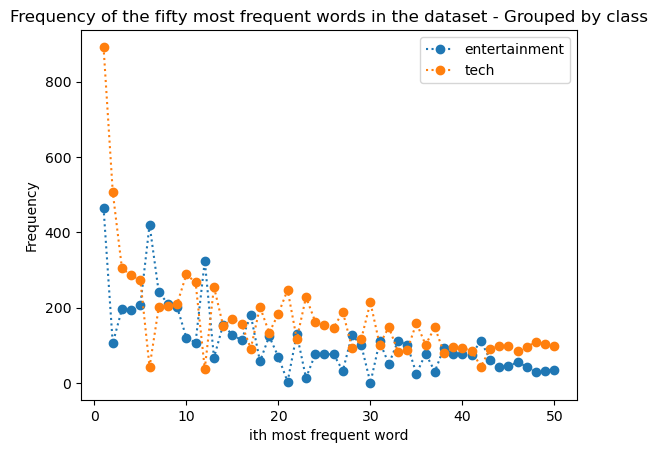

In [167]:
# code for task 1 b/ii
# Assuming this is using the above words, and getting their frequencies for each class



# Get the frequencies of the top 50 features for each class

plt.plot()

for class_name in unique_classes:
    #Get indices (Rows) of the matrix which corresonds to current class
    class_indices = np.where(y == class_name)[0]
    #Now get the frequencies of the top 50 features for this class
    class_frequencies_ii = X[class_indices][:, indices_50].sum(axis=0) # Sum the frequencies of the correct rows and columns
    plt.plot([i+1 for i in range(50)], class_frequencies_ii, linestyle=':', marker='o', label=class_name)

plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
# plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", alpha=0.4, label="Data Point") Overlay plot i)
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset - Grouped by class")
plt.show()
        


#### iii) Class distribution - plot frequency of classes.

216 212


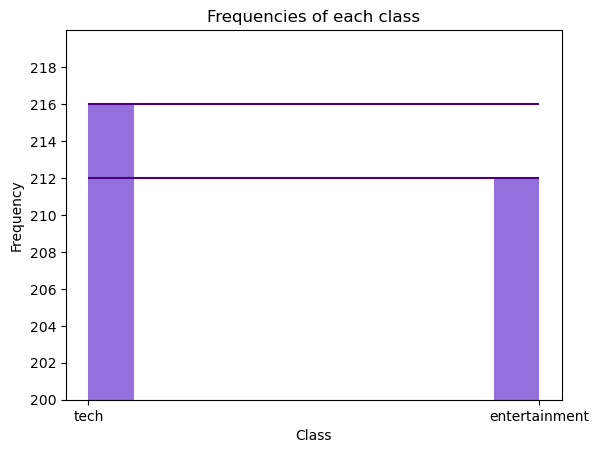

In [168]:
# code for task 1 b/iii
plt.hist(y, color="mediumpurple")
print(np.count_nonzero(y[y == "tech"]), np.count_nonzero(y[y == "entertainment"]))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequencies of each class")
plt.yticks(np.arange(0,220, step=2))
plt.ylim(200, 220)
plt.hlines(216, xmin=0, xmax=1, colors="indigo")
plt.hlines(212, xmin=0, xmax=1, colors="indigo")
plt.show()


In [169]:
# get test data
test_df = pd.read_csv('test.csv')
test_y = test_df["Category"].to_numpy()
test_X = cv.transform(test_df['Text']).toarray()

print(f"{test_df} \n {test_y} \n {test_X}")

     ArticleId                                               Text  \
0         1821  johnny denise lose passport johnny vaughan den...   
1          522  bt offers free net phone calls bt offering cus...   
2          636  power people says hp digital revolution focuse...   
3          170  stars gear bafta ceremony film stars across gl...   
4           85  controversial film tops festival controversial...   
..         ...                                                ...   
101       1904  beastie boys win sampling battle us rappers be...   
102        857  double eviction big brother model caprice holb...   
103        325  dj double act revamp chart show dj duo jk joel...   
104       1587  apple ipod family expands market apple expande...   
105        538  santy worm makes unwelcome visit thousands web...   

          Category  
0    entertainment  
1             tech  
2             tech  
3    entertainment  
4    entertainment  
..             ...  
101  entertainment  
102

## Task 2: Classification Models Learning
### Task 2 A
#### Naive Bayes Classifier
#### i) Report top 20 most identifiable words that are most likely to occur in the articles over two classes

In [170]:
# code for task 2 a/i

#### ii) Report the top 20 words that maximise the the probability quantity P(Xw = 1|Y = y)/P(Xw = 1| Y != y). Which list of words describe the 2 classes better?

In [171]:
# code for task 2 a/ii

### Task 2 B
#### K-Nearest Neighbours Classifier
#### Report surface plot of the kNN with your choice of hyperparameters k and distance metric. Explain the impact of k and the distance metric on the decision boundary.

In [172]:
# code for task 2 b
# for surface plots check note on assignment pdf at bottom of task 2

### Task 2 C
#### Support Vector Machines
#### i) Soft margin linear kernel SVM
#### Report surface plot and explain the impact of the penalty C hyperparameter

In [173]:
# code for task 2 C soft margin linear kernel svm
# for surface plots check note on assignment pdf at bottom of task 2
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Use SKLearn to fit our data into a linear SVM model
cValue = 1.45
soft_linear = svm.SVC(kernel="linear", C=cValue)
soft_linear.fit(X, y)

## Test Accuracy with test.csv:
# Using the test data we have (test_df) to see how the model predicts based on C value.
test_pred = soft_linear.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_pred, normalize=True)
print(f"Accuracy for soft margin SVM at C-Penalty={cValue}: {accuracy*100:.2f}%\n")



Accuracy for soft margin SVM at C-Penalty=1.45: 94.34%



## PCA-Reduced Soft-margin SVM Model

Accuracy for PCA-reduced SVM at C-Penalty=1.45: 83.02%



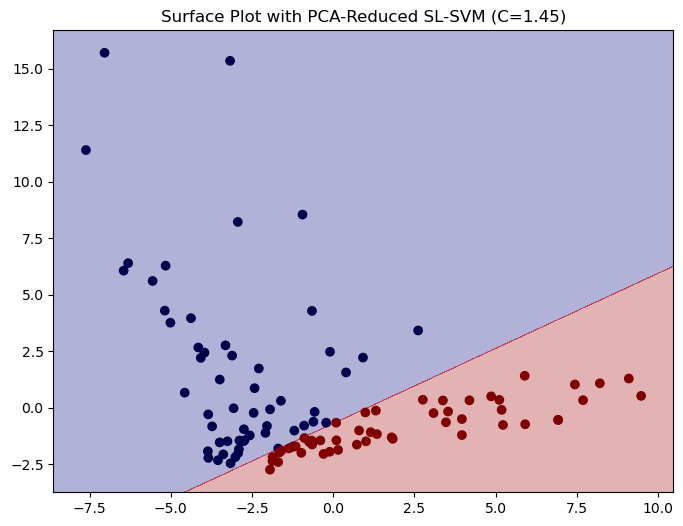

In [ ]:
## Create a surface plot for our SVM using Principal Component Analysis :
# Use PCA to reduce the dimensionality of our test,training-data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
test_X_pca = pca.transform(test_X)

# encode the pred and test labels for plotting
le = LabelEncoder()
y_encoded = le.fit_transform(y)
test_y_encoded = le.transform(test_y)

# Retrain our SVM on PCA-reduced data
sl_pca = svm.SVC(kernel="linear", C=cValue)
sl_pca.fit(X_pca, y_encoded)
# Prediction + Accuracy to show that PCA reduces SVM accuracy
pred = sl_pca.predict(test_X_pca)
acc = metrics.accuracy_score(test_y_encoded, pred, normalize=True)
print(f"Accuracy for PCA-reduced SVM at C-Penalty={cValue}: {acc*100:.2f}%\n")
color_assignment = le.fit_transform(pred)  # 'entertainment' → 0, 'tech' → 1

# mesh grid to plot decision regions/boundary
x = test_X_pca[:, 0]
y = test_X_pca[:, 1]

x_min, x_max = x.min() -  1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# predict on the mesh grid to get decision regions
Z = sl_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='seismic')  # Decision boundary/region
plt.scatter(test_X_pca[:, 0], test_X_pca[:, 1], c=color_assignment, cmap='seismic')
plt.title(f'Surface Plot with PCA-Reduced SL-SVM (C={cValue})')
plt.show()

### PCA Dimensionality Reduction
I chose to use PCA from SciKitLearn.decomposition; to plot the surface plot properly (and include an accurate soft margin representation) we're reducing the dimensionality of the dataset and creating an SVM based on that as a PCA-reduced model.

## Impact of C on Soft-margin Linear SVM
The soft-margin linear SVM is basically the same as hard-margin except with a low penalty value (C). The effect of having lower C values will create larger margins which increase accuracy% as our model predicts more categories for each word (good for categories with very different articles/noisy data). 

With higher C-penalty the margin for misclassification is lower having a "lower" accuracy for our test articles due to high penalisation. Ironically this means the SVM is penalising and misclassifying noisy data, as high C value is better for uniform data.

**Lower C** runs the risk of **underfitting**, (our *decision boundary gets larger*, more lenient)

while if it is **too high** we have the risk of **overfitting** (*decision boundary gets smaller*, more strict).

#### ii) Hard margin RBF kernel SVM
#### Report surface plot and explain the impact of the kernel width hyperparameter

In [175]:
# code for task 2 C hard margin rbf kernel svm
# for surface plots check note on assignment pdf at bottom of task 2

### Task 2 D
#### Neural Network
#### add more details later

In [176]:
# code for task 2 D neural network